## Homework
The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').In this homework we'll again use the California Housing Prices dataset - the same one we used in homework 2 and 3.

### You can take the dataset from Kaggle or download using following technique:

In [107]:
# https://stackoverflow.com/questions/57748687/downloading-files-in-jupyter-wget-on-windows
import urllib.request
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'
filename = 'housing.csv'
urllib.request.urlretrieve(url, filename)

('housing.csv', <http.client.HTTPMessage at 0x152f0ec14f0>)

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Loading the data
Use only the following columns:

* 'latitude',

* 'longitude',

* 'housing_median_age',

* 'total_rooms',

* 'total_bedrooms',

* 'population',

* 'households',

* 'median_income',

* 'median_house_value',

* 'ocean_proximity'

* Fill NAs with 0.

* Apply the log tranform to median_house_value.

* Do train/validation/test split with 60%/20%/20% distribution.

* Use the train_test_split function and set the random_state parameter to 1.

* Use DictVectorizer to turn the dataframe into matrices.

In [110]:
cols = ['latitude',

'longitude',

'housing_median_age',

'total_rooms',

'total_bedrooms',

'population',

'households',

'median_income',

'median_house_value',

'ocean_proximity']

In [111]:
df_new = df[cols]
df_new.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### Fill NAs with 0

In [112]:
df_new.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [113]:
df_new['total_bedrooms'] = df_new['total_bedrooms'].fillna(0)

In [114]:
df_new.isna().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

#### Apply the log tranform to median_house_value.

In [115]:
df_new['median_house_value'] = np.log(df_new['median_house_value'])
df_new.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,13.022764,NEAR BAY
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,12.789684,NEAR BAY
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,12.771671,NEAR BAY
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,12.740517,NEAR BAY
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,12.743151,NEAR BAY


#### * Do train/validation/test split with 60%/20%/20% distribution.
#### * Use the train_test_split function and set the random_state parameter to 1

In [116]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df_new, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train.shape, df_test.shape, df_val.shape

((12384, 10), (4128, 10), (4128, 10))

In [117]:
y_train = df_train['median_house_value'].values
y_test = df_test['median_house_value'].values
y_val = df_val['median_house_value'].values

del df_train['median_house_value']
del df_test['median_house_value']
del df_val['median_house_value']

#### Use DictVectorizer to turn the dataframe into matrices

In [118]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

test_dict = df_test.to_dict(orient='records')
X_test = dv.transform(test_dict)


### Question 1
Let's train a decision tree regressor to predict the median_house_value variable.

* Train a model with max_depth=1.
* Which feature is used for splitting the data?

* ocean_proximity=INLAND
* total_rooms
* latitude
* population

In [119]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=1)

model.fit(X_train, y_train)

y_pred = model.predict(X_val)

In [120]:
from sklearn.tree import export_text
print(export_text(model, feature_names=dv.get_feature_names()))

|--- ocean_proximity=INLAND <= 0.50
|   |--- value: [12.31]
|--- ocean_proximity=INLAND >  0.50
|   |--- value: [11.61]



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Answer 1 - ocean_proximity=INLAND

### Question 2
Train a random forest model with these parameters:

* n_estimators=10
* random_state=1
* n_jobs=-1 (optional - to make training faster)
* What's the RMSE of this model on validation?

    * 0.05
    * 0.25
    * 0.55
    * 0.85

In [121]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rfr = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_val)

rmse = mean_squared_error(y_val, y_pred)

print(rmse.round(3))

0.06


### Answer 2 - RMSE is 0.05

### Question 3
* Now let's experiment with the n_estimators parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set random_state to 1.
* Evaluate the model on the validation dataset.
* After which value of n_estimators does RMSE stop improving?

    * 10
    * 50
    * 70
    * 150

In [122]:
for r in range (10, 201, 10):
    rfr = RandomForestRegressor(n_estimators=r, random_state=1, n_jobs=-1)
    rfr.fit(X_train, y_train)

    y_pred = rfr.predict(X_val)

    rmse = mean_squared_error(y_val, y_pred)

    print(f"{r} : {rmse.round(3)}")

10 : 0.06
20 : 0.057
30 : 0.055
40 : 0.055
50 : 0.054
60 : 0.054
70 : 0.054
80 : 0.054
90 : 0.054
100 : 0.054
110 : 0.054
120 : 0.054
130 : 0.054
140 : 0.054
150 : 0.054
160 : 0.054
170 : 0.054
180 : 0.054
190 : 0.054
200 : 0.054


### Answer 3 - RMSE stops improving after n_estimators = 50.

### Question 4
Let's select the best max_depth:

* Try different values of max_depth: [10, 15, 20, 25]
* For each of these values, try different values of n_estimators from 10 till 200 (with step 10)
* Fix the random seed: random_state=1
* What's the best max_depth:

    * 10
    * 15
    * 20
    * 25

In [123]:
for m in [10, 15, 20, 25]:
    for r in range(10, 201, 10):
        
        rfr = RandomForestRegressor(n_estimators=r,max_depth=m ,random_state=1, n_jobs=-1)
        rfr.fit(X_train, y_train)

        y_pred = rfr.predict(X_val)

        rmse = mean_squared_error(y_val, y_pred)

        print(f"{m}, {r} : {rmse.round(3)}")

10, 10 : 0.065
10, 20 : 0.064
10, 30 : 0.063
10, 40 : 0.063
10, 50 : 0.063
10, 60 : 0.063
10, 70 : 0.062
10, 80 : 0.062
10, 90 : 0.062
10, 100 : 0.062
10, 110 : 0.062
10, 120 : 0.062
10, 130 : 0.062
10, 140 : 0.062
10, 150 : 0.062
10, 160 : 0.062
10, 170 : 0.062
10, 180 : 0.062
10, 190 : 0.062
10, 200 : 0.062
15, 10 : 0.06
15, 20 : 0.058
15, 30 : 0.056
15, 40 : 0.056
15, 50 : 0.055
15, 60 : 0.055
15, 70 : 0.055
15, 80 : 0.055
15, 90 : 0.055
15, 100 : 0.055
15, 110 : 0.055
15, 120 : 0.055
15, 130 : 0.055
15, 140 : 0.055
15, 150 : 0.054
15, 160 : 0.054
15, 170 : 0.054
15, 180 : 0.054
15, 190 : 0.055
15, 200 : 0.054
20, 10 : 0.061
20, 20 : 0.057
20, 30 : 0.055
20, 40 : 0.055
20, 50 : 0.054
20, 60 : 0.054
20, 70 : 0.054
20, 80 : 0.054
20, 90 : 0.054
20, 100 : 0.054
20, 110 : 0.054
20, 120 : 0.054
20, 130 : 0.054
20, 140 : 0.054
20, 150 : 0.054
20, 160 : 0.054
20, 170 : 0.054
20, 180 : 0.054
20, 190 : 0.054
20, 200 : 0.054
25, 10 : 0.06
25, 20 : 0.057
25, 30 : 0.055
25, 40 : 0.055
25, 50 : 

### Answer 4 - The best max_depth is 10.

### Question 5
We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorith, it finds the best split. When doint it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the imporatant features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

For this homework question, we'll find the most important feature:

Train the model with these parametes:
* n_estimators=10,
* max_depth=20,
* random_state=1,
* n_jobs=-1 (optional)

Get the feature importance information from this model
* What's the most important feature?

    * total_rooms
    * median_income
    * total_bedrooms
    * longitude

In [124]:
rfr = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rfr.fit(X_train, y_train)
l = zip(cols, list(rfr.feature_importances_.round(3)))
print(set(l))

{('total_bedrooms', 0.364), ('median_house_value', 0.0), ('population', 0.003), ('total_rooms', 0.097), ('households', 0.311), ('latitude', 0.017), ('housing_median_age', 0.101), ('ocean_proximity', 0.004), ('median_income', 0.0), ('longitude', 0.033)}


### Answer 5 - The most important feature is total_bedrooms

### Question 6
Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:
    * xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
    }
* Now change eta from 0.3 to 0.1.

* Which eta leads to the best RMSE score on the validation dataset?

    * 0.3
    * 0.1
    * Both gives same

In [125]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [126]:
import xgboost as xgb

In [127]:
dtrain = xgb.DMatrix(X_train, label = y_train)
dval = xgb.DMatrix(X_val, label=y_val)

In [128]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [129]:
%%capture output

xgb_params = { 'eta': 0.3, 'max_depth': 6, 'min_child_weight': 1,

'objective': 'reg:squarederror', 'nthread': 8,

'seed': 1, 'verbosity': 1, }

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  evals=watchlist)

In [130]:
s = output.stdout

In [131]:
print(s)

[0]	train-rmse:8.12733	val-rmse:8.13244
[1]	train-rmse:5.69586	val-rmse:5.70069
[2]	train-rmse:3.99539	val-rmse:4.00040
[3]	train-rmse:2.80712	val-rmse:2.81078
[4]	train-rmse:1.97834	val-rmse:1.98174
[5]	train-rmse:1.40218	val-rmse:1.40740
[6]	train-rmse:1.00099	val-rmse:1.00699
[7]	train-rmse:0.72751	val-rmse:0.73438
[8]	train-rmse:0.54190	val-rmse:0.55046
[9]	train-rmse:0.42167	val-rmse:0.43233
[10]	train-rmse:0.34481	val-rmse:0.35782
[11]	train-rmse:0.29835	val-rmse:0.31360
[12]	train-rmse:0.27101	val-rmse:0.28869
[13]	train-rmse:0.25275	val-rmse:0.27343
[14]	train-rmse:0.24302	val-rmse:0.26628
[15]	train-rmse:0.23575	val-rmse:0.26099
[16]	train-rmse:0.23035	val-rmse:0.25701
[17]	train-rmse:0.22594	val-rmse:0.25389
[18]	train-rmse:0.22137	val-rmse:0.24960
[19]	train-rmse:0.21743	val-rmse:0.24699
[20]	train-rmse:0.21461	val-rmse:0.24532
[21]	train-rmse:0.21240	val-rmse:0.24460
[22]	train-rmse:0.21152	val-rmse:0.24413
[23]	train-rmse:0.20834	val-rmse:0.24287
[24]	train-rmse:0.20580	va

In [132]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [133]:
df_score = parse_xgb_output(output)

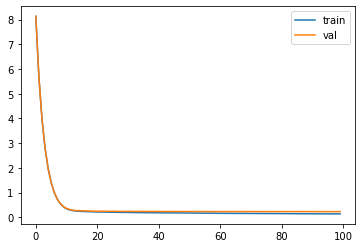

In [134]:
plt.plot(df_score.num_iter, df_score.train_rmse, label='train')
plt.plot(df_score.num_iter, df_score.val_rmse, label='val')
plt.legend()

In [135]:
%%capture output

xgb_params = { 'eta': 0.1, 'max_depth': 6, 'min_child_weight': 1,

'objective': 'reg:squarederror', 'nthread': 8,

'seed': 1, 'verbosity': 1, }

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  evals=watchlist)

In [136]:
s = output.stdout
print(s)

[0]	train-rmse:10.44371	val-rmse:10.44937
[1]	train-rmse:9.40118	val-rmse:9.40684
[2]	train-rmse:8.46290	val-rmse:8.46830
[3]	train-rmse:7.61859	val-rmse:7.62390
[4]	train-rmse:6.85878	val-rmse:6.86366
[5]	train-rmse:6.17511	val-rmse:6.17976
[6]	train-rmse:5.55996	val-rmse:5.56444
[7]	train-rmse:5.00644	val-rmse:5.01079
[8]	train-rmse:4.50846	val-rmse:4.51263
[9]	train-rmse:4.06044	val-rmse:4.06456
[10]	train-rmse:3.65747	val-rmse:3.66144
[11]	train-rmse:3.29493	val-rmse:3.29852
[12]	train-rmse:2.96890	val-rmse:2.97268
[13]	train-rmse:2.67580	val-rmse:2.67960
[14]	train-rmse:2.41209	val-rmse:2.41607
[15]	train-rmse:2.17503	val-rmse:2.17860
[16]	train-rmse:1.96209	val-rmse:1.96592
[17]	train-rmse:1.77071	val-rmse:1.77456
[18]	train-rmse:1.59876	val-rmse:1.60289
[19]	train-rmse:1.44451	val-rmse:1.44902
[20]	train-rmse:1.30614	val-rmse:1.31096
[21]	train-rmse:1.18108	val-rmse:1.18618
[22]	train-rmse:1.06956	val-rmse:1.07525
[23]	train-rmse:0.96911	val-rmse:0.97509
[24]	train-rmse:0.87978	

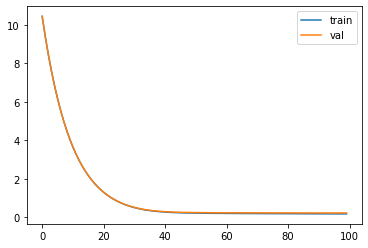

In [137]:
df_score = parse_xgb_output(output)
plt.plot(df_score.num_iter, df_score.train_rmse, label='train')
plt.plot(df_score.num_iter, df_score.val_rmse, label='val')
plt.legend()

### Answer 6 - The best RMSE score is for eta=0.1